In [65]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np

 Your spectra have been computed! 😎 
 Your spectra have been computed! 😎 
 A  1e-06  m air layer has been inserted into layer numbe  4
 Use the `material_X( 4 ) command to define the material of this new layer!
 A  1e-06  m air layer has been inserted into layer numbe  4
 Use the `material_X( 4 ) command to define the material of this new layer!


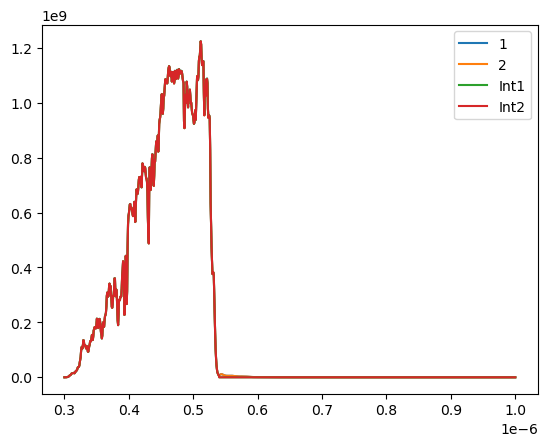

381938936.4429071


In [66]:
"""unit test for the computation of the gradients of stpv quantities
    including the stpv_power_density and the spectral_efficiency"""
test_args = {
    "wavelength_list": [300e-9, 1000e-9, 1000],
    "material_list": ["Air", "SiO2", "Al2O3", "Polystyrene", "Air"],
    "thickness_list": [0, 200.1e-9, 300e-9, 1000e-9, 0],
    "temperature": 440,
    "pv_bandgap_wavelength" : 540e-9
}
sf = wptherml.SpectrumFactory()
test = sf.spectrum_factory("Tmm", test_args)

test2_args = {
    "wavelength_list": [300e-9, 1000e-9, 1000],
    "material_list": ["Air", "SiO2", "Al2O3", "Polystyrene", "Air"],
    "thickness_list": [0, 199.9e-9, 300e-9, 1000e-9, 0],
    "temperature": 440,
    "pv_bandgap_wavelength" : 540e-9
}
sf = wptherml.SpectrumFactory()
test2 = sf.spectrum_factory("Tmm", test2_args)


_ln = len(test.thickness_array) - 1
# insert thick active layer as the bottom-most layer
test.insert_layer(_ln, 1000e-9)
# make sure the active layer has RI of 2D perovskite
test.material_2D_HOIP(_ln)
test.compute_spectrum()
#test.compute_pv_stpv_gradient()

# insert thick active layer as the bottom-most layer
test2.insert_layer(_ln, 1000e-9)
# make sure the active layer has RI of 2D perovskite
test2.material_2D_HOIP(_ln)
test2.compute_spectrum()

# scale AM by \lambda / \lambda_bg
# compute the useful power density spectrum
power_density_array_1 = (
    test._solar_spectrum * test.emissivity_array * test.wavelength_array / test.pv_lambda_bandgap
)

power_density_array_2 = (
    test._solar_spectrum * test2.emissivity_array * test.wavelength_array / test.pv_lambda_bandgap
)

bg_idx = np.abs(test.wavelength_array - test.pv_lambda_bandgap).argmin()

env = np.zeros_like(test.wavelength_array)

env[:bg_idx] = test.wavelength_array[:bg_idx] / test.pv_lambda_bandgap

pd1_integrand = test._solar_spectrum * test.emissivity_array * env
pd2_integrand = test._solar_spectrum * test2.emissivity_array * env

#pv_stpv_jsc = np.pi * np.trapz(
#    power_density_array[:bg_idx], self.wavelength_array[:bg_idx]
#)

#plt.plot(test.wavelength_array, test.emissivity_array, label="A")
#plt.plot(test.wavelength_array, test._solar_spectrum/1.4e9, label="AM")
#plt.plot(test.wavelength_array, env, label="env")
plt.plot(test.wavelength_array, power_density_array_1, label="1")
plt.plot(test.wavelength_array, power_density_array_2, label="2")
plt.plot(test.wavelength_array, pd1_integrand, label="Int1")
plt.plot(test.wavelength_array, pd2_integrand, label="Int2")


plt.plot()
#plt.plot(test.wavelength_array, test.reflectivity_array, label="R")
#plt.plot(test.wavelength_array, test.transmissivity_array, label="T")
plt.legend()
plt.show()


pd1 = np.pi * np.trapz(power_density_array_1, test.wavelength_array)
pd2 = np.pi * np.trapz(power_density_array_2, test.wavelength_array)

pd1p = np.pi * np.trapz(pd1_integrand, test.wavelength_array)
pd2p = np.pi * np.trapz(pd2_integrand, test.wavelength_array)

grad = (pd1p - pd2p) / (2 * .1e-9)
print(grad)

 A  1e-06  m air layer has been inserted into layer numbe  5
 Use the `material_X( 5 ) command to define the material of this new layer!
 A  1e-06  m air layer has been inserted into layer numbe  5
 Use the `material_X( 5 ) command to define the material of this new layer!


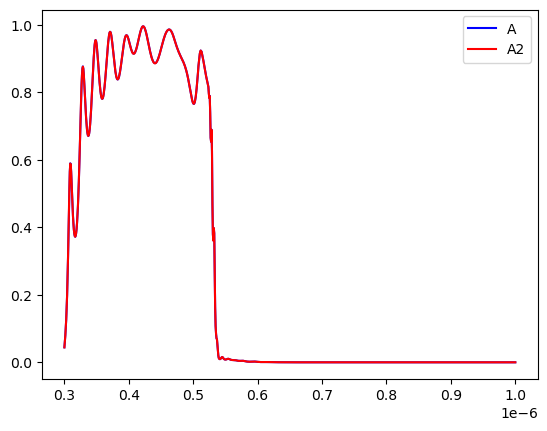

0.1915342488501951


In [67]:

_ln = len(test.thickness_array) - 1
# insert thick active layer as the bottom-most layer
test.insert_layer(_ln, 1000e-9)
# make sure the active layer has RI of 2D perovskite
test.material_2D_HOIP(_ln)
test.compute_spectrum()
#test.compute_pv_stpv_gradient()

# insert thick active layer as the bottom-most layer
test2.insert_layer(_ln, 1000e-9)
# make sure the active layer has RI of 2D perovskite
test2.material_2D_HOIP(_ln)
test2.compute_spectrum()

plt.plot(test.wavelength_array, test.emissivity_array, 'blue', label="A")
plt.plot(test2.wavelength_array, test2.emissivity_array, 'red', label="A2")
#plt.plot(test.wavelength_array, test.reflectivity_array, label="R")
#plt.plot(test.wavelength_array, test.transmissivity_array, label="T")
plt.legend()
plt.show()

diff = np.abs(test.emissivity_array - test2.emissivity_array)
sum_abs = np.sum(diff)
print(sum_abs)

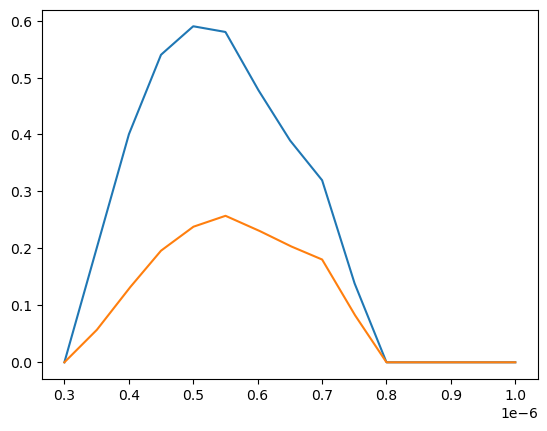

In [68]:
test.psc_thickness = 250
test._full_spectral_response()
plt.plot(test.wavelength_array, test.perovskite_eqe)
plt.plot(test.wavelength_array, test.perovskite_spectral_response)
plt.show()


In [57]:
test.compute_pv_stpv_jsc()
_jsc_b = test.pv_stpv_jsc

test2.compute_pv_stpv_jsc()
_jsc_f = test2.pv_stpv_jsc

print("forward jsc", _jsc_f)
print("backward jsc", _jsc_b)
print("difference", _jsc_f - _jsc_b)


 A  1e-06  m air layer has been inserted into layer numbe  6
 Use the `material_X( 6 ) command to define the material of this new layer!
 A  1e-06  m air layer has been inserted into layer numbe  6
 Use the `material_X( 6 ) command to define the material of this new layer!
forward jsc 141.81671290733698
backward jsc 141.84264480341773
difference -0.025931896080749084


In [41]:
"""unit test for the computation of the gradients of stpv quantities
including the stpv_power_density and the spectral_efficiency"""
test_args = {
    "wavelength_list": [300e-9, 1000e-9, 1000],
    "material_list": ["Air", "SiO2", "Al2O3", "Polystyrene", "Air"],
    "thickness_list": [0, 200e-9, 300e-9, 1000e-9, 0],
    "temperature": 440,
    "pv_bandgap_wavelength" : 540e-9
}
sf = wptherml.SpectrumFactory()
test = sf.spectrum_factory("Tmm", test_args)


# define a displacement in thickness of SiO2
_delta_d_sio2 = 0.1e-9
# take forward step and store quantities
test.thickness_array[1] += _delta_d_sio2
# update R, T, and \epsilon
test.compute_spectrum()
# use updated \epsilon to compute jsc
test.compute_pv_stpv_jsc()
_jsc_f = test.pv_stpv_jsc

# create a new instance of the stack using test_args so that
# the stack only contains the AR + Polystyrene layer
test = sf.spectrum_factory("Tmm", test_args)

# take backward step and store quantities
test.thickness_array[1] -= _delta_d_sio2
test.compute_spectrum()
test.compute_pv_stpv_jsc()
_jsc_b = test.pv_stpv_jsc

print(_jsc_f)
_numeric_sio2_layer_gradient = (_jsc_f - _jsc_b) / (2 * _delta_d_sio2)
print(_numeric_sio2_layer_gradient)

 Your spectra have been computed! 😎 
 A  1e-06  m air layer has been inserted into layer numbe  4
 Use the `material_X( 4 ) command to define the material of this new layer!
 Your spectra have been computed! 😎 
 A  1e-06  m air layer has been inserted into layer numbe  4
 Use the `material_X( 4 ) command to define the material of this new layer!
138.1486576962321
121574939.38815378


In [42]:
test._solar_spectrum = test._read_AM()
test.compute_spectrum_gradient()

# Initialize short circuit current array
e_gradient_index = len(test.emissivity_gradient_array[0, :])
test.pv_stpv_short_circuit_current_gradient = np.zeros(e_gradient_index)

bg_idx = np.abs(test.wavelength_array - test.pv_lambda_bandgap).argmin()
_spectral_response = np.zeros_like(test.wavelength_array)

_spectral_response[:bg_idx] =test.wavelength_array[:bg_idx] / test.pv_lambda_bandgap

# Iterate over material thicknesses
for i in range(0, e_gradient_index):
    test.pv_stpv_short_circuit_current_gradient[i] = np.pi * np.trapz(
        test.emissivity_gradient_array[:,i]
        * _spectral_response
        * test._solar_spectrum,
        test.wavelength_array,
    )  # Integrate for short circuit current

In [28]:
print(e_gradient_index)
print(test.pv_stpv_short_circuit_current_gradient)


3
[3.82331334e+08 4.53558066e+07 9.48990165e+07]
